# Sampling Distributions

We will need to import some data to work with sampling distributions.

In [1]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
p <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

We also need our **sample.data.frame()** function.

In [2]:
sample.data.frame <- function(x, size, replace = FALSE, prob = NULL, groups=NULL, 
                              orig.ids = TRUE, fixed = names(x), shuffled = c(),
                              invisibly.return = NULL, ...) {
  if( missing(size) ) size = nrow(x)
  if( is.null(invisibly.return) ) invisibly.return = size>50 
  shuffled <- intersect(shuffled, names(x))
  fixed <- setdiff(intersect(fixed, names(x)), shuffled)
  n <- nrow(x)
  ids <- 1:n
  groups <- eval( substitute(groups), x )
  newids <- sample(n, size, replace=replace, prob=prob, ...)
  origids <- ids[newids]
  result <- x[newids, , drop=FALSE]
  
  idsString <- as.character(origids)
  
  for (column in shuffled) {
    cids <- sample(newids, groups=groups[newids])
    result[,column] <- x[cids,column]
    idsString <- paste(idsString, ".", cids, sep="")
  }
  
  result <-  result[ , union(fixed,shuffled), drop=FALSE]
  if (orig.ids) result$orig.id <- idsString
  
  
  if (invisibly.return) { return(invisible(result)) } else {return(result)}
}

## Example 1: United Airlines and Flight Delays

We have a list of nearly 14,000 flights from United airlines together with the flight numbers, destinations, and delays for each flight. Let's inspect a few rows of the data frame below.

In [46]:
head(united, 5)

Date,Flight.Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64


### Distribution

Before we use the CLT and Law of Large Numbers to estimate the average delay for a United flight, let's inspect the distribution of delays in the original data frame. We will calculate the mean along with displaying the distribution using a histogram.

The mean of the United delays distribution: 16.65816

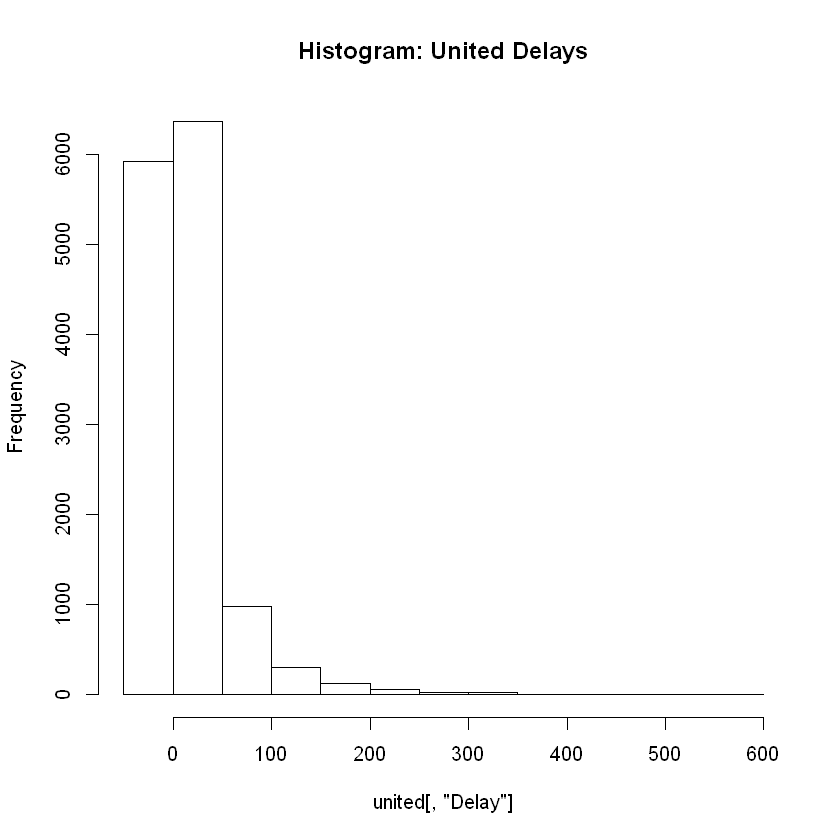

In [47]:
cat('The mean of the United delays distribution:', mean(united[ , 'Delay'])) 
hist(united[ , 'Delay'], main = 'Histogram: United Delays')

**Histograms and Bin Widths**

We have too few bars in our histogram. We can control how many bars are produced (and the bin width or interval width along the $x$-axis) with the **breaks** option. Try seveal values between 50 and 150 to see which shows the best picture of this distribution.

The mean of the United delays distribution: 16.65816

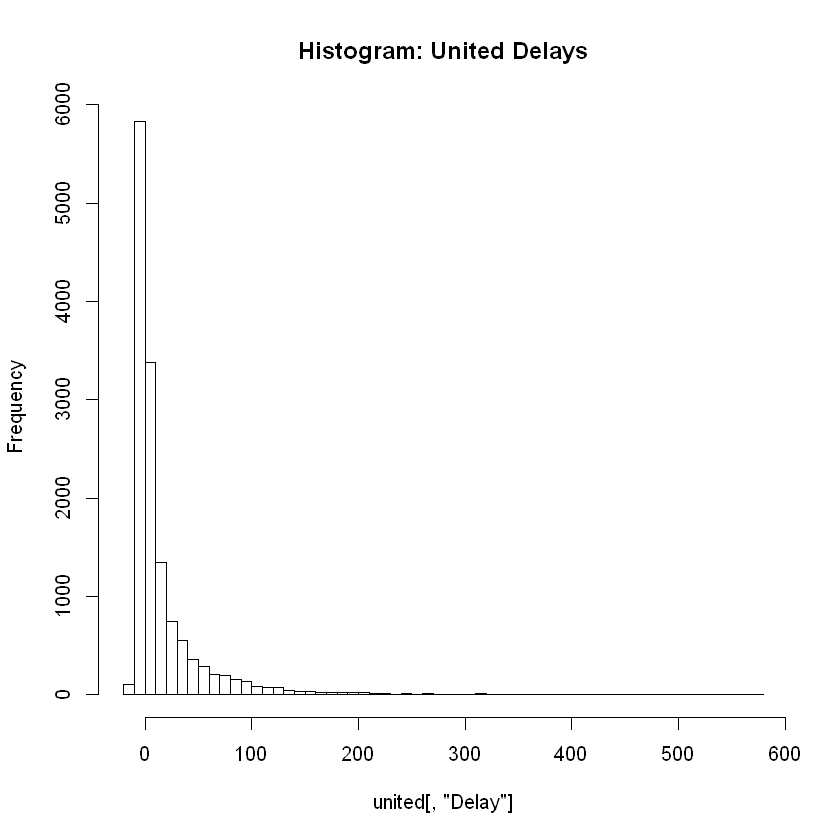

In [48]:
cat('The mean of the United delays distribution:', mean(united[ , 'Delay'])) 
hist(united[ , 'Delay'], breaks = 75, main = 'Histogram: United Delays')

### Your Task

Use sampling distributions to estimate the average delay in the United data set. Use the following sample sizes:

1. 10
2. 25
3. 50
4. 100
5. 250

Standard deviation of sampling distribution: 12.69959 
The middle 90% of sampling distribution: ( 1.695 , 42.7 ).

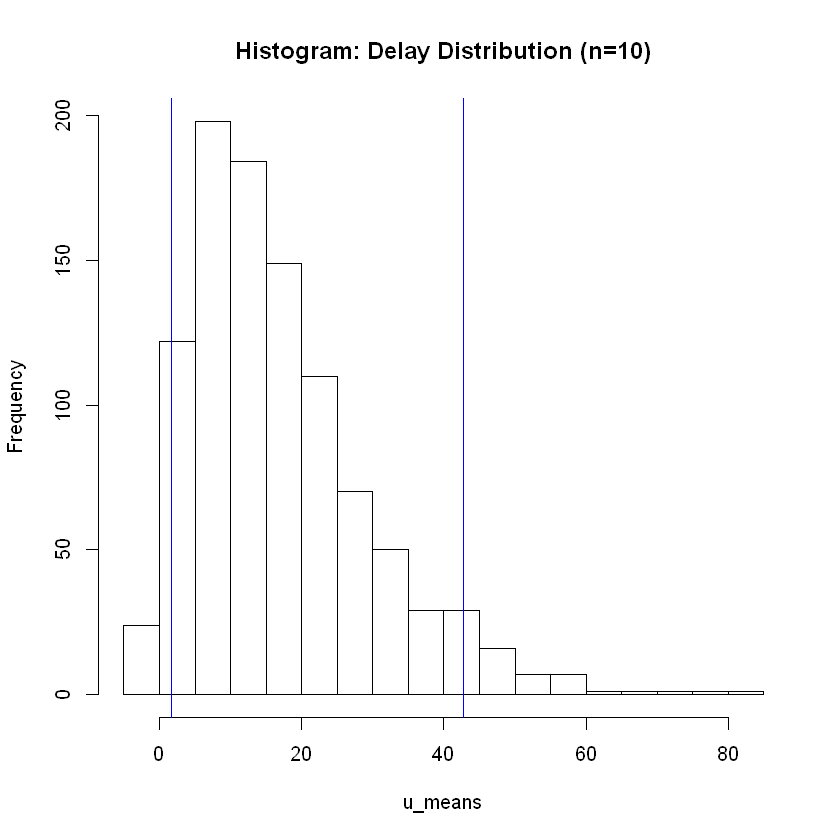

In [49]:
u_means <- c()

for (count in 1:1000){
    sample <- sample.data.frame(united, 10, orig.ids = F)        #Controls sample size
    u_means[count] <- mean(sample[ , 'Delay'])
}

hi <- quantile(u_means, prob = 0.95)
lo <- quantile(u_means, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(u_means), '\nThe middle 90% of sampling distribution: (',lo,',',hi,').')
hist(u_means, breaks = 20, main = 'Histogram: Delay Distribution (n=10)')
abline( v = lo, col="blue")
abline(v = hi, col="blue")

Standard deviation of sampling distribution: 12.69959 
The middle 90% of sampling distribution: ( 6.474 , 31.766 ).

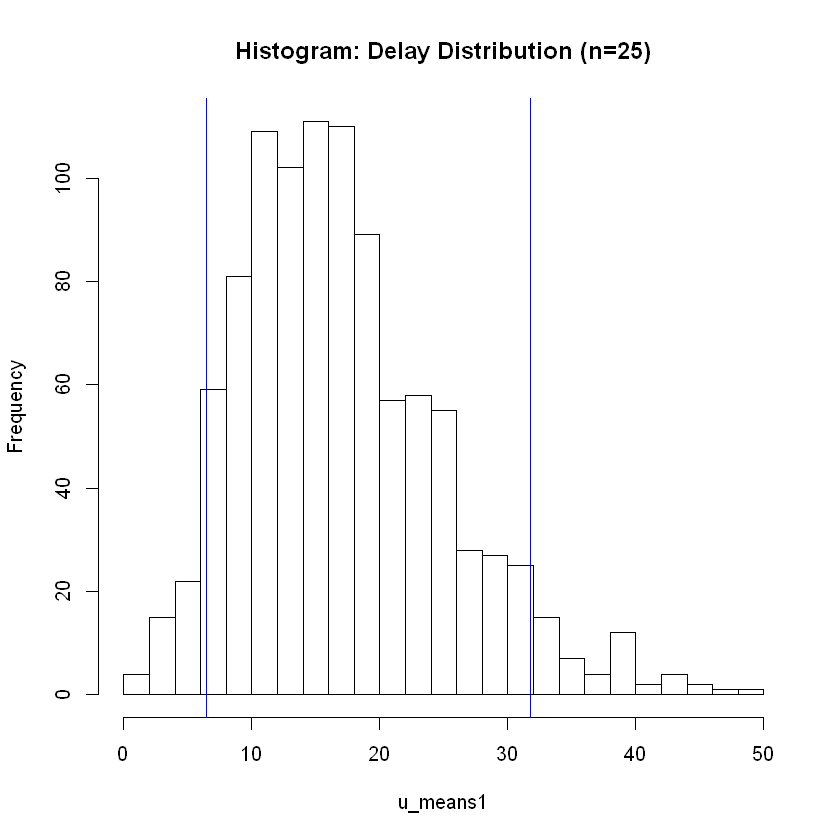

In [50]:
u_means1 <- c()

for (count in 1:1000){
    sample <- sample.data.frame(united, 25, orig.ids = F)        #Controls sample size
    u_means1[count] <- mean(sample[ , 'Delay'])
}

hi1 <- quantile(u_means1, prob = 0.95)
lo1 <- quantile(u_means1, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(u_means), '\nThe middle 90% of sampling distribution: (',lo1,',',hi1,').')
hist(u_means1, breaks = 20, main = 'Histogram: Delay Distribution (n=25)')
abline( v = lo1, col="blue")
abline(v = hi1, col="blue")

Standard deviation of sampling distribution: 12.69959 
The middle 90% of sampling distribution: ( 8.478 , 25.783 ).

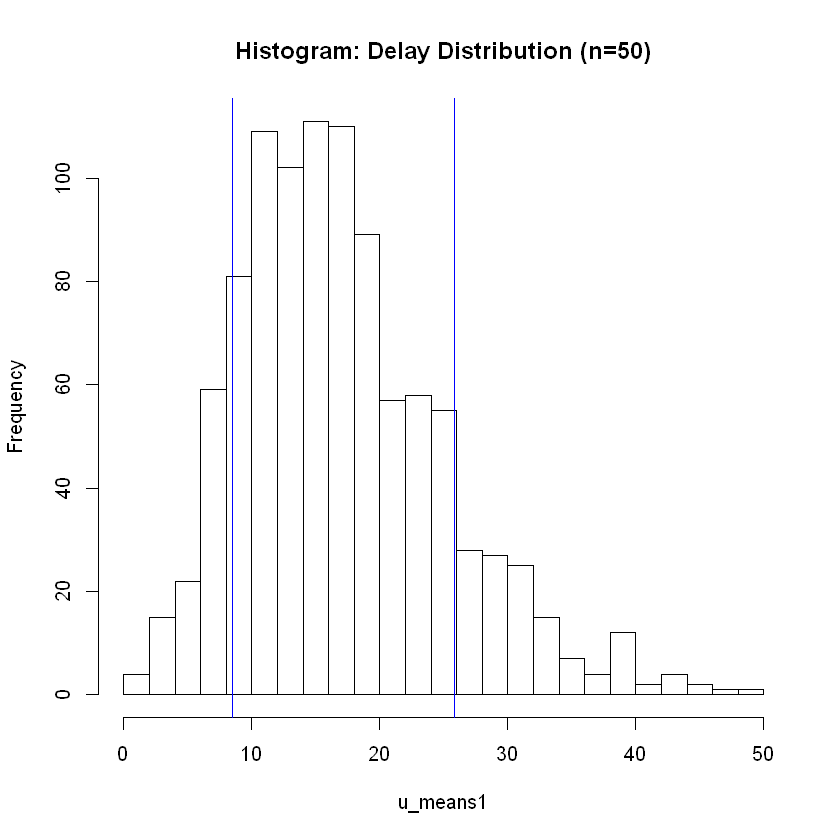

In [51]:
u_means2 <- c()

for (count in 1:1000){
    sample <- sample.data.frame(united, 50, orig.ids = F)        #Controls sample size
    u_means2[count] <- mean(sample[ , 'Delay'])
}

hi2 <- quantile(u_means2, prob = 0.95)
lo2 <- quantile(u_means2, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(u_means), '\nThe middle 90% of sampling distribution: (',lo2,',',hi2,').')
hist(u_means1, breaks = 20, main = 'Histogram: Delay Distribution (n=50)')
abline( v = lo2, col="blue")
abline(v = hi2, col="blue")

Standard deviation of sampling distribution: 12.69959 
The middle 90% of sampling distribution: ( 10.7795 , 23.582 ).

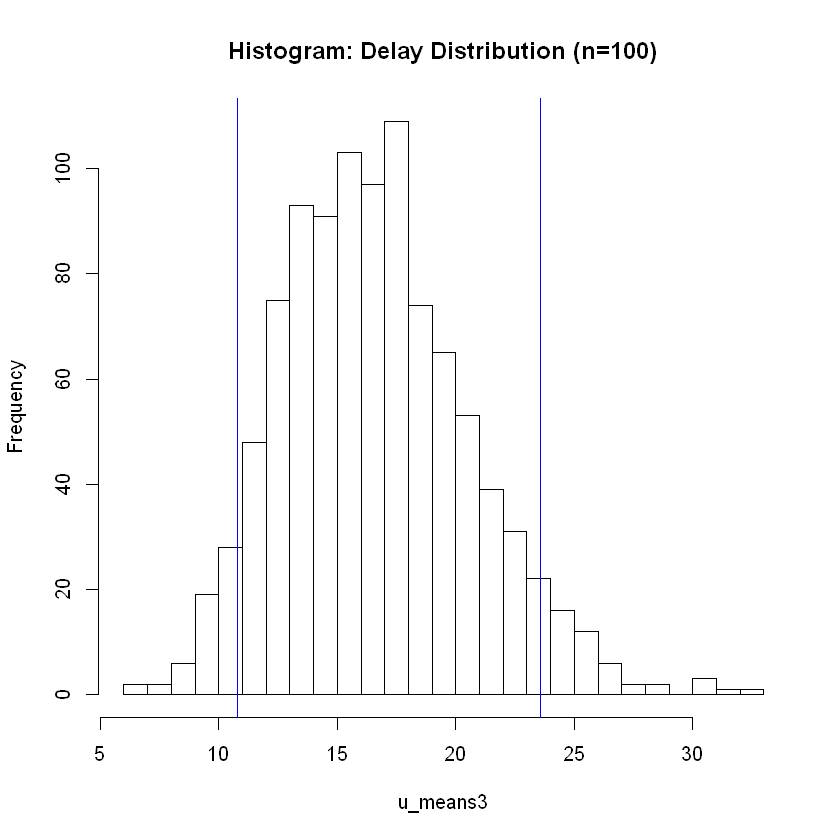

In [52]:
u_means3 <- c()

for (count in 1:1000){
    sample <- sample.data.frame(united, 100, orig.ids = F)        #Controls sample size
    u_means3[count] <- mean(sample[ , 'Delay'])
}

hi3 <- quantile(u_means3, prob = 0.95)
lo3 <- quantile(u_means3, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(u_means), '\nThe middle 90% of sampling distribution: (',lo3,',',hi3,').')
hist(u_means3, breaks = 20, main = 'Histogram: Delay Distribution (n=100)')
abline( v = lo3, col="blue")
abline(v = hi3, col="blue")

Standard deviation of sampling distribution: 12.69959 
The middle 90% of sampling distribution: ( 12.456 , 20.6962 ).

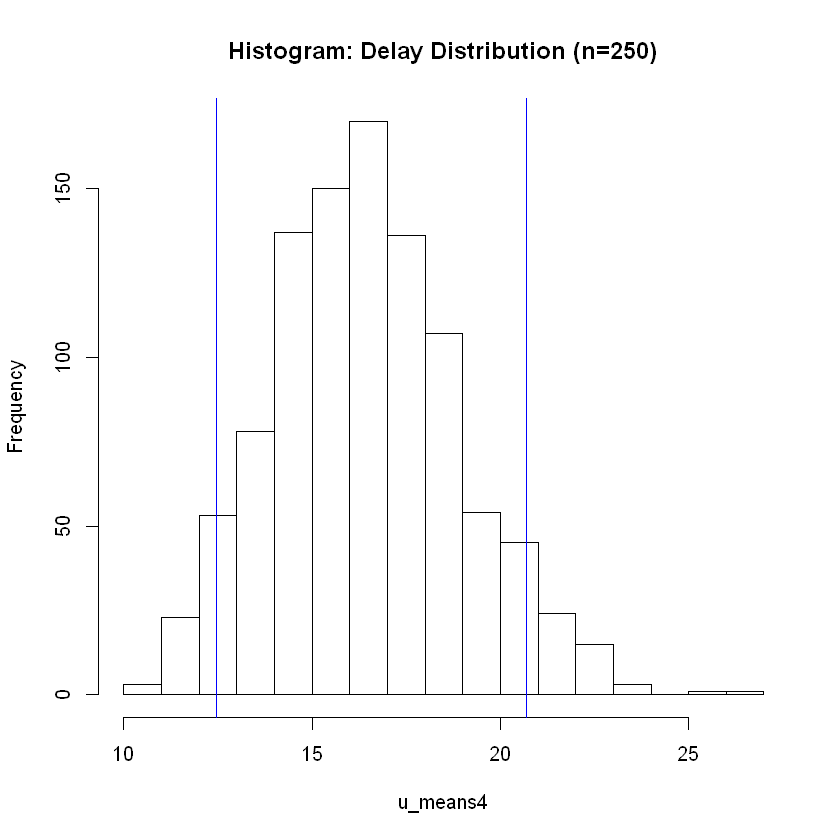

In [53]:
u_means4 <- c()

for (count in 1:1000){
    sample <- sample.data.frame(united, 250, orig.ids = F)        #Controls sample size
    u_means4[count] <- mean(sample[ , 'Delay'])
}

hi4 <- quantile(u_means4, prob = 0.95)
lo4 <- quantile(u_means4, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(u_means), '\nThe middle 90% of sampling distribution: (',lo4,',',hi4,').')
hist(u_means4, breaks = 20, main = 'Histogram: Delay Distribution (n=250)')
abline( v = lo4, col="blue")
abline(v = hi4, col="blue")

In [54]:
cat('For n = 10, the standard deviation was ',sd(u_means),' and the middle 90% was between ',lo,' and ',hi,'\n')
cat('For n = 25, the standard deviation was ',sd(u_means1),' and the middle 90% was between ',lo1,' and ',hi1,'\n')
cat('For n = 50, the standard deviation was ',sd(u_means2),' and the middle 90% was between ',lo2,' and ',hi2,'\n')
cat('For n = 100, the standard deviation was ',sd(u_means3),' and the middle 90% was between ',lo3,' and ',hi3,'\n')
cat('For n = 250, the standard deviation was ',sd(u_means4),' and the middle 90% was between ',lo4,' and ',hi4,'\n')

For n = 10, the standard deviation was  12.69959  and the middle 90% was between  1.695  and  42.7 
For n = 25, the standard deviation was  7.969742  and the middle 90% was between  6.474  and  31.766 
For n = 50, the standard deviation was  5.319171  and the middle 90% was between  8.478  and  25.783 
For n = 100, the standard deviation was  3.92419  and the middle 90% was between  10.7795  and  23.582 
For n = 250, the standard deviation was  2.465467  and the middle 90% was between  12.456  and  20.6962 
